<a href="https://colab.research.google.com/github/Asmaaad37/Computer-Vision/blob/main/Spacial_Enhancement_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

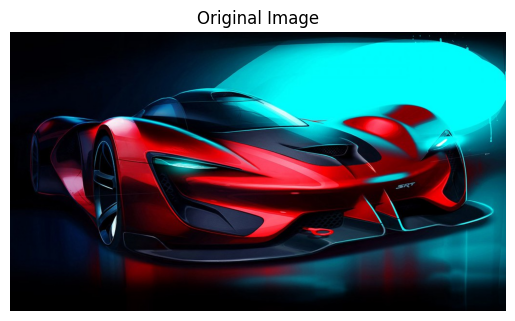

In [10]:
import cv2
import matplotlib.pyplot as plt

# load the image
image = cv2.imread('/content/Car.jpg', cv2.IMREAD_COLOR)

# Convert from BGR to RGB for correct color display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

**Gaussian Filter: Smoothing Images**
- Helps reduce noise and details in an image.

The main purpose of the Gaussian filter is to:

- **Reduce noise:** It smooths the image by averaging pixel intensities, making the image less sharp.
- **Blur the image:** Useful in applications such as image pre-processing before edge detection or object recognition.

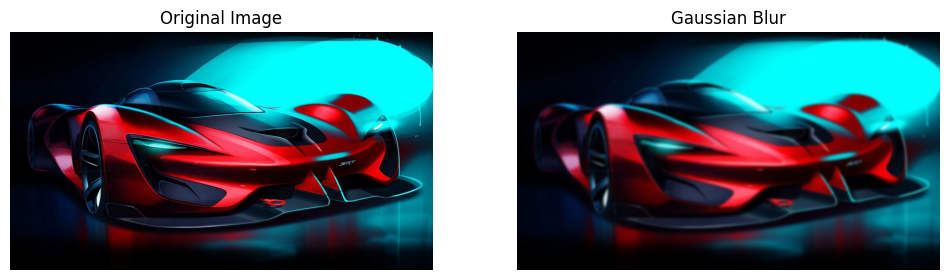

In [8]:
# Apply Gausian Filter
kernel_size = (15, 15)
sigma_value = 0
gaussian_blur = cv2.GaussianBlur(image_rgb, kernel_size, sigma_value)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")

# Display the Gaussian-blurred image
ax[1].imshow(gaussian_blur)
ax[1].set_title("Gaussian Blur")
ax[1].axis("off")

plt.show()


**Laplacian Filter: Detecting Edges**
- The Laplacian filter works by computing the second-order derivative of an image. It detects areas where the intensity of pixel values changes rapidly, highlighting edges. Unlike first-order filters (like the Sobel filter), which only look at the gradient (rate of change), the Laplacian filter detects zero-crossings, which are places where the rate of change switches direction. This makes it particularly useful for detecting sharp edges.

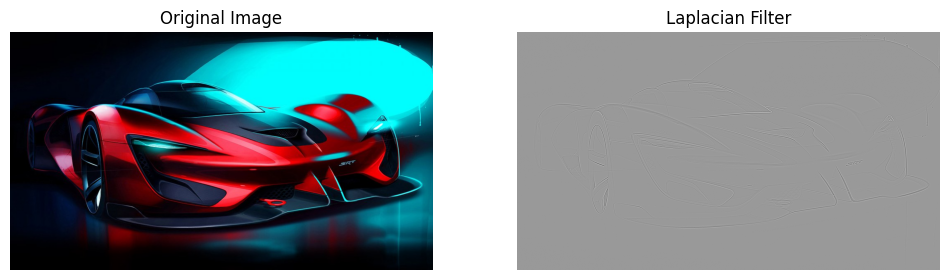

In [12]:
# Convert images to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Laplacian filter
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
axes[0].imshow(image_rgb)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Display the Laplacian filtered image
axes[1].imshow(laplacian, cmap='gray')
axes[1].set_title("Laplacian Filter")
axes[1].axis("off")

plt.show()

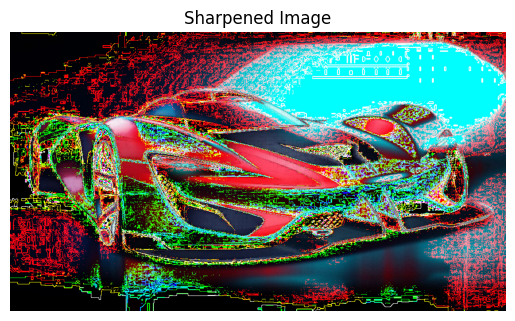

In [14]:
# Get sharpened image by subtracting the Laplacian filtered image from the original image
# Convert Laplacian to 8-bit for display and subtraction
laplacian_8u = cv2.convertScaleAbs(laplacian)
sharpened_image = image_rgb - cv2.cvtColor(laplacian_8u, cv2.COLOR_GRAY2RGB)

# Display the sharpened image
plt.imshow(sharpened_image)
plt.title("Sharpened Image")
plt.axis('off')
plt.show()

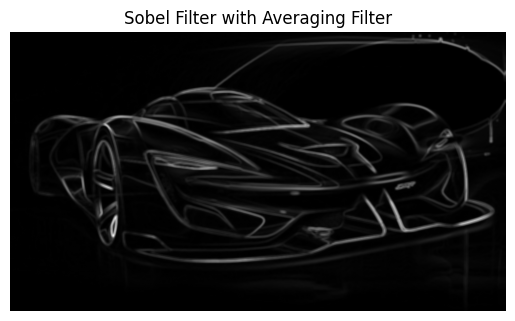

In [16]:
# Apply Sobel filter in the x and y directions
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)

# Combine the x and y gradients
sobel_combined = cv2.magnitude(sobelx, sobely)

# Apply a 5x5 averaging filter
smoothed_image = cv2.blur(sobel_combined, (5, 5))

# Display the smoothed image
plt.imshow(smoothed_image, cmap='gray')
plt.title("Sobel Filter with Averaging Filter")
plt.axis('off')
plt.show()

/tmp/ipython-input-789726202.py:5: RuntimeWarning: invalid value encountered in power
  power_law_transformed = np.power(smoothed_image, gamma)


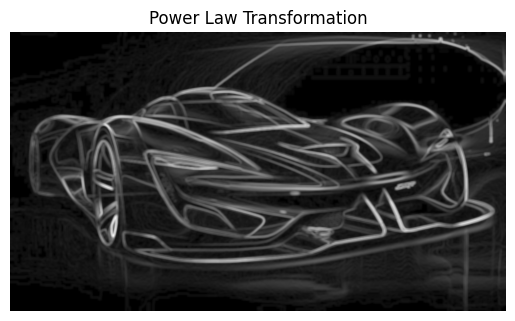

In [17]:
import numpy as np

# Apply power law transformation
gamma = 0.5  # You can adjust this value
power_law_transformed = np.power(smoothed_image, gamma)

# Normalize the image to the range [0, 255] for display
power_law_transformed = cv2.normalize(power_law_transformed, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Display the transformed image
plt.imshow(power_law_transformed, cmap='gray')
plt.title("Power Law Transformation")
plt.axis('off')
plt.show()